# 6.4 Supervised Machine Learning: Regression

## Table of Contents
### 01. Importing Libraries and Data
### 02. Data Cleaning 
### 03. Data prep for regression analysis
### 04. Regression Analysis


## 01. Importing Libraries and Data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
%matplotlib inline

In [5]:
#creating path
path = r'C:\Users\canam\Achievement 6\Citibike Analysis'

In [6]:
#importing data 
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'citibike_cleaned.csv'), index_col = False)

## 02. Data Cleaning 

In [8]:
df.columns

Index(['Unnamed: 0', 'day_of_week', 'start_hour', 'start_time',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'subscriber', 'gender', 'age', 'trip_duration_mins'],
      dtype='object')

In [9]:
#dropping the unnamed column 
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [10]:
#checking to see if column has been dropped 
df.columns

Index(['day_of_week', 'start_hour', 'start_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'subscriber', 'gender', 'age', 'trip_duration_mins'],
      dtype='object')

### Missing values

In [12]:
# Check for missing values
df.isnull().sum()

day_of_week                0
start_hour                 0
start_time                 0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_time                   0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
subscriber                 0
gender                     0
age                        0
trip_duration_mins         0
dtype: int64

In [13]:
#no missing values

### Duplicates Check

In [15]:
dups = df.duplicated()

In [16]:
dups.shape

(50000,)

In [17]:
#no duplicates

## 03. Data prep for regression analysis

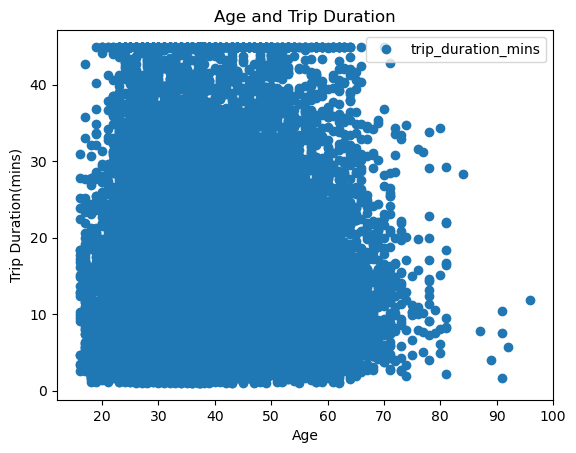

In [19]:
# Creating a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'age', y='trip_duration_mins',style='o')
plt.title('Age and Trip Duration')  
plt.xlabel('Age')  
plt.ylabel('Trip Duration(mins)')  
plt.show()

#### Hypothesis:
Age does not have an effect on trip duration.  

In [21]:
# Reshaping the variables into NumPy arrays and putting them into separate objects.

X = df['age'].values.reshape(-1,1)
y = df['trip_duration_mins'].values.reshape(-1,1)

In [22]:
X

array([[45.        ],
       [30.        ],
       [24.        ],
       ...,
       [52.        ],
       [37.37221357],
       [33.        ]])

In [23]:
y

array([[16.55      ],
       [ 9.68333333],
       [ 6.01666667],
       ...,
       [17.5       ],
       [44.95      ],
       [ 6.16666667]])

In [24]:
# Splitting data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 04. Regression Analysis

In [26]:
# Creating a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [27]:
# Fitting the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [28]:
# Predicting the values of y using X.

y_predicted = regression.predict(X_test)

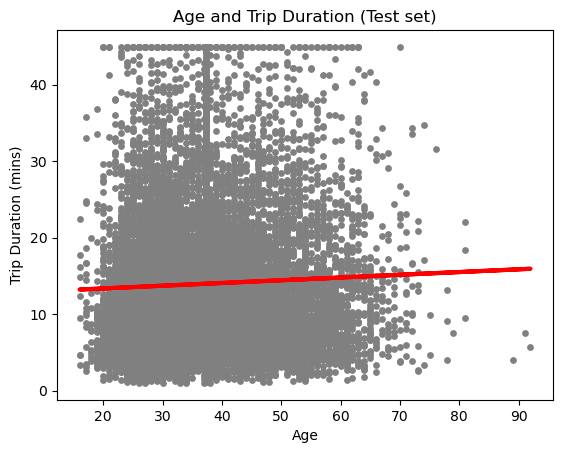

In [29]:
# Creating a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Age and Trip Duration (Test set)')
plot_test.xlabel('Age')
plot_test.ylabel('Trip Duration (mins)')
plot_test.show()

The regression line doesn't fit the data well at all.  There are many data points that are far away from it.    

In [51]:
# Creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score

In [53]:
# Printing the model summary statistics. 
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03575269]]
Mean squared error:  92.35859066207924
R2 score:  0.0016722401021782574


In [60]:
# Creating a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,6.000000,14.715545
1,27.100000,14.429524
2,18.950000,13.978046
3,12.633333,13.978046
4,5.100000,14.322265
5,11.166667,13.785975
6,5.500000,13.750222
7,18.416667,13.978046
8,3.550000,13.499954
9,4.316667,14.429524


#### Inisghts:
The root mean squared error is quite large meaning that a regression may not be the best model to represent this data and can’t accurately predict the influence of age on trip duration.
The R2 score is very close to 0, further indicating that the model is not a good fit.
The comparison between actual values and predicted values of y show that actual values are quite different from predicted values.

#### Potential Biases and Effects:
The dataset only includes data from September 2013.  Rider behavior could change from month to month or year to year.  Perhaps if there was more data from different months/years, the model would have been a better fit. 